In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy.solvers import solve
%matplotlib inline

In [2]:
A, x, om, th_0, a_n, a_t, v, s =sp.symbols("A, x, om, \\theta_0, a_n, a_t, v, \\sigma")

In [3]:
a_t_max_c = 10
a_n_max_c = 6
v_max_c = 1.5
A_c = 1
om_c = 3
th_0_c = 0.2
x_s, x_f = 0, 4

dx = 100
X = np.linspace(x_s, x_f, dx)

t_s = v_max_c / a_t_max_c
s_s = v_max_c * t_s

In [16]:
traj = A*sp.sin(om*x+th_0)
traj_1 = sp.diff(traj, x)
traj_2 = sp.diff(traj_1, x)
curve_r = sp.sqrt((1+traj_1**2))**3/abs(traj_2)

In [17]:
path = traj.subs({A:A_c, om:om_c, th_0:th_0_c})
path

sin(3*x + 0.2)

In [18]:
radius = curve_r.subs({A:A_c, om:om_c, th_0:th_0_c})
radius

(9*cos(3*x + 0.2)**2 + 1)**(3/2)/(9*Abs(sin(3*x + 0.2)))

In [19]:
a_n = v_max_c**2/radius
a_n

20.25*Abs(sin(3*x + 0.2))/(9*cos(3*x + 0.2)**2 + 1)**(3/2)

In [20]:
v = sp.sqrt(a_n_max_c * radius)
v

sqrt(6)*sqrt((9*cos(3*x + 0.2)**2 + 1)**(3/2)/Abs(sin(3*x + 0.2)))/3

In [21]:
s = sp.sqrt(1+traj_1.subs({A:A_c, om:om_c, th_0:th_0_c})**2)
v_s = sp.diff(s, x)

In [41]:
Y = np.array([path.subs(x, i) for i in X])
R = np.array([radius.subs(x, i) for i in X])
V_MAX = np.array([min(math.sqrt(a_n_max_c*i), v_max_c) for i in R])

V = []
A_N = []
for i in X:
    a_normal = a_n.subs(x, i)
    if abs(a_normal) <= a_n_max_c:
        V.append(v_max_c)
        A_N.append(a_normal)
    else:
        V.append(v.subs(x, i))
        A_N.append(a_n_max_c)
V = np.array(V)
A_N = np.array(A_N)

In [39]:
import math
dX = np.gradient(X)
A_T = np.gradient(V)/dX

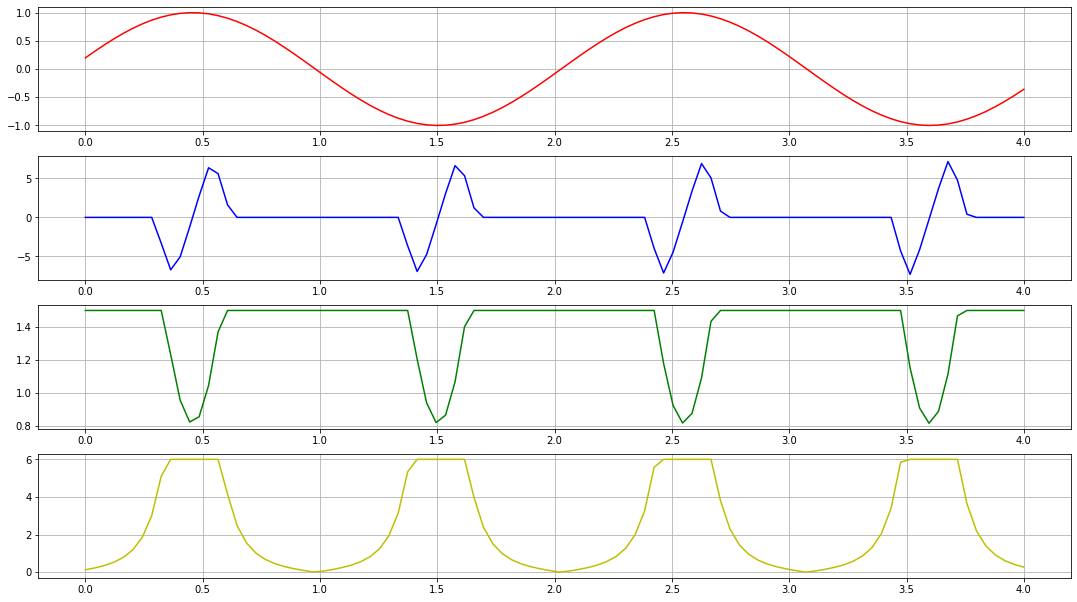

In [42]:
fig, ax = plt.subplots(4)
fig.set_size_inches(18.5, 10.5)
ax[0].plot(X,Y,"r-")
ax[1].plot(X,A_T,"b-")
ax[2].plot(X,V_MAX,"g-")
ax[3].plot(X,A_N,"y-")

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.show()

In [43]:
time = 0
t_list = [0]
# print(X)
for i in range(dx-1):
    dv = V_MAX[i+1] + V_MAX[i]
    ddy = (Y[i+1] - Y[i])**2
    ddx = (X[i+1] - X[i])**2
    ddxddy = math.sqrt(ddy + ddy)
    time += ddxddy / (dv / 2)
    t_list.append(float(time))
print(float(time))

7.1790656054053406


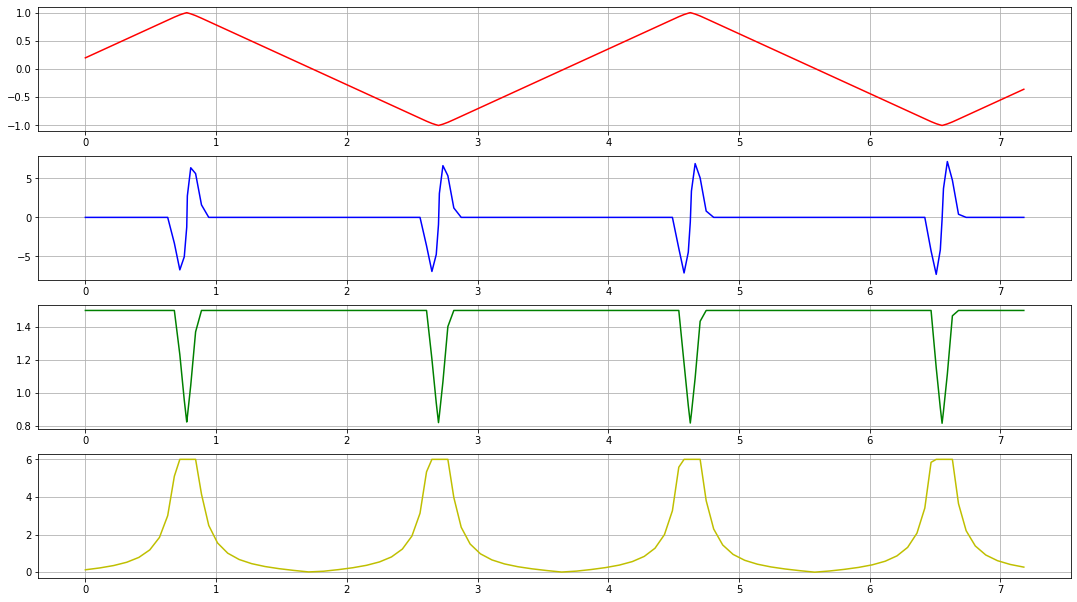

In [26]:
fig, ax = plt.subplots(4)
fig.set_size_inches(18.5, 10.5)
ax[0].plot(t_list,Y,"r-")
ax[1].plot(t_list,A_T,"b-")
ax[2].plot(t_list,V_MAX,"g-")
ax[3].plot(t_list,A_N,"y-")

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.show()